# Chapter 6. Advanced Regression
## Author: Rahul Bhadani

# 1. Kernel Functions

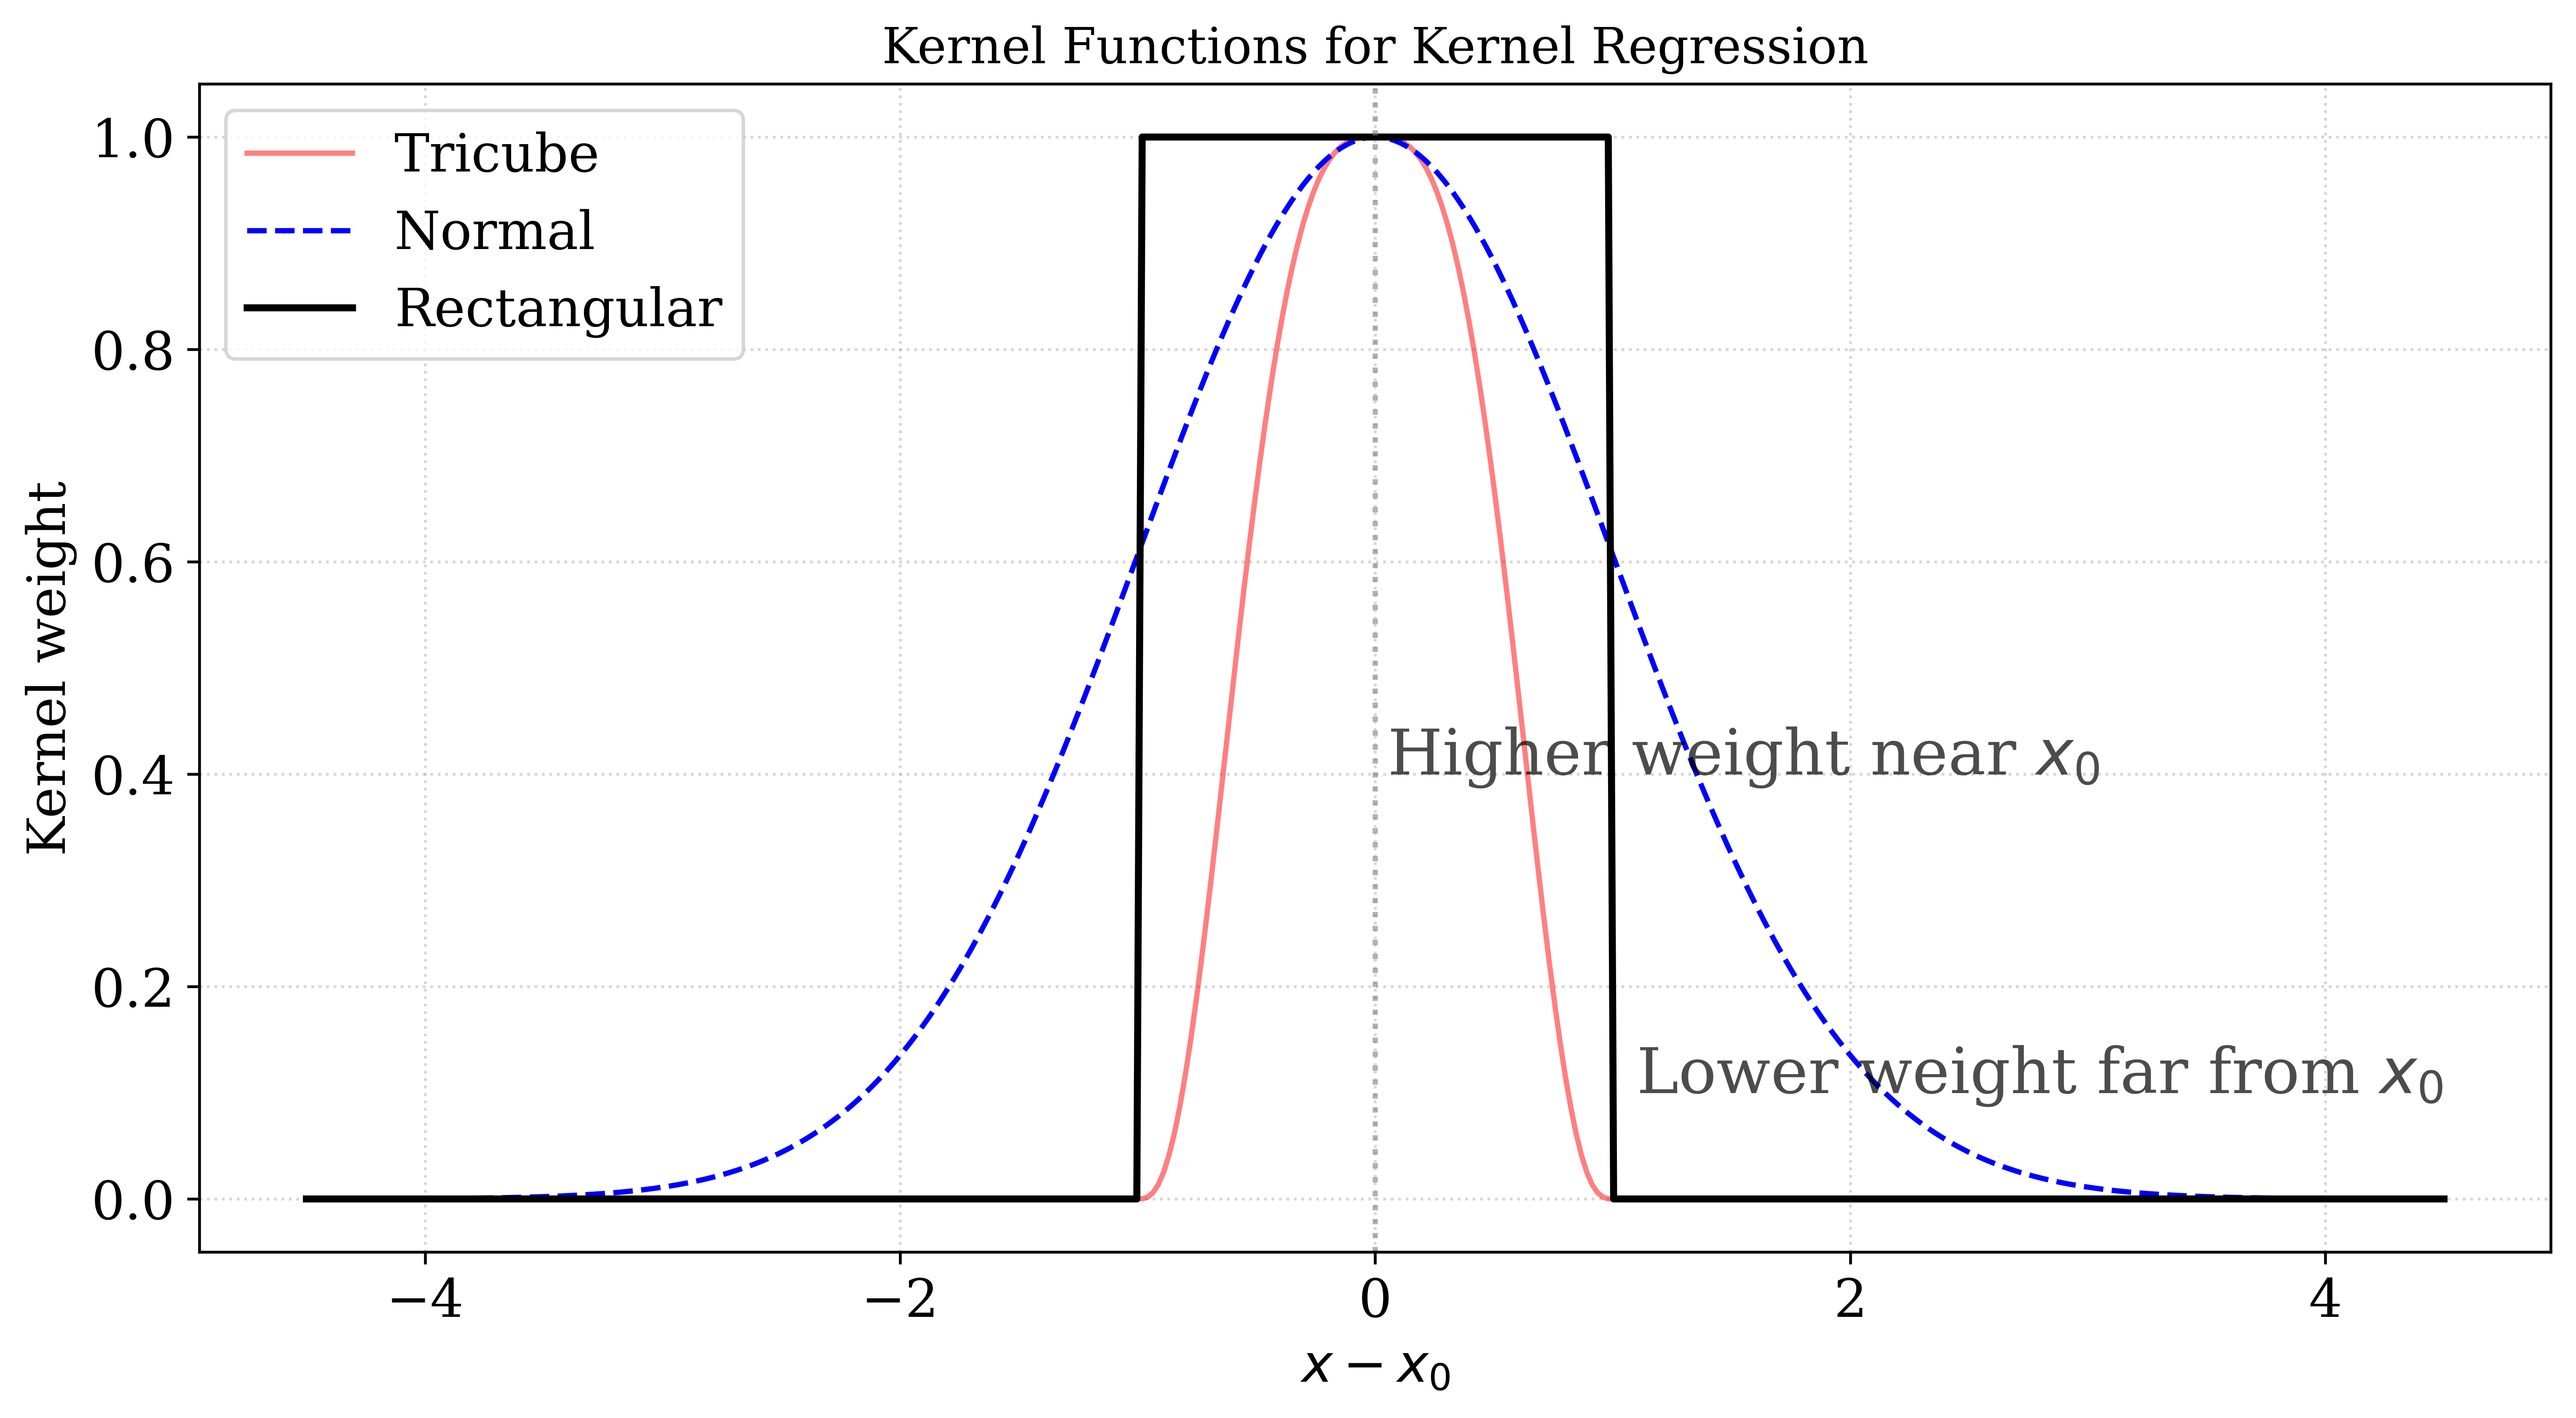

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15
from scipy.stats import norm

def tricube_kernel(x):
    """Tricube kernel function scaled to max 1."""
    abs_x = np.abs(x)
    return np.where(abs_x < 1, ((70 / 81) * (1 - abs_x**3) ** 3) / (70 / 81), 0)

def rectangular_kernel(x):
    """Rectangular (uniform) kernel function scaled to max 1."""
    return np.where(np.abs(x) < 1, 1, 0)

def normal_kernel(x):
    """Normal (Gaussian) kernel function, rescaled to max 1."""
    return norm.pdf(x) / norm.pdf(0)

# Generate x values
x = np.linspace(-4.5, 4.5, 400)

# Compute kernel values
y_tricube = tricube_kernel(x)
y_normal = normal_kernel(x)
y_rectangular = rectangular_kernel(x)

# Plot the kernel functions
plt.figure(figsize=(12, 6), dpi=600)
plt.plot(x, y_tricube, 'r', linestyle='-', alpha=0.5, label='Tricube')
plt.plot(x, y_normal, 'b--', label='Normal')
plt.plot(x, y_rectangular, 'k', linewidth=2, label='Rectangular')

# Highlight kernel regression concept
plt.axvline(0, color='gray', linestyle=':', alpha=0.6)
plt.text(0.05, 0.4, 'Higher weight near $x_0$', fontsize=18, color='black', alpha=0.7)
plt.text(1.1, 0.1, 'Lower weight far from $x_0$', fontsize=18, color='black', alpha=0.7)

# Labels and legend
plt.xlabel('$x - x_0$', fontsize=15)
plt.ylabel('Kernel weight', fontsize=15)
plt.title('Kernel Functions for Kernel Regression', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.savefig('../figures/loess_kernel.pdf', transparent=True)
plt.show()

# 2. Synthetic Dataset Generation with Linear Model

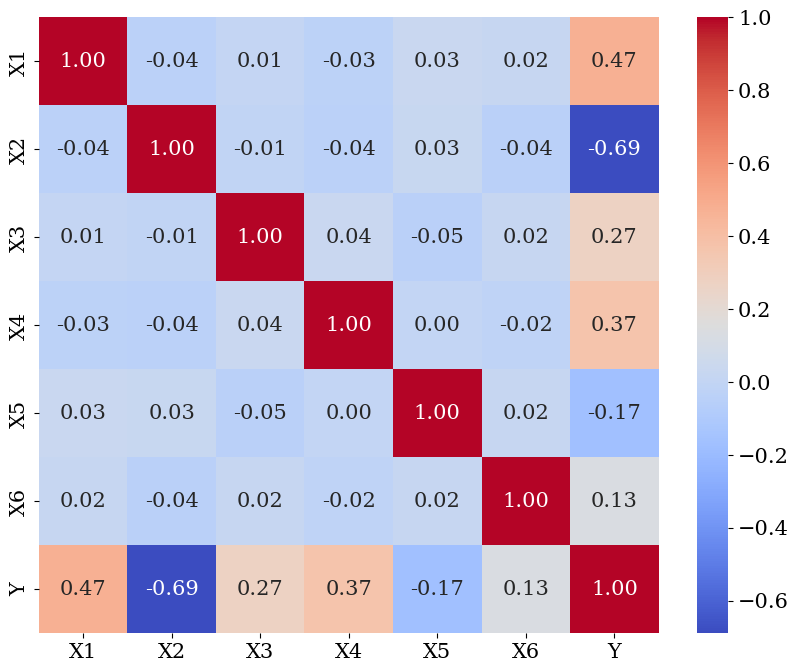

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Set seed for reproducibility
np.random.seed(420)

# Step 2: Generate synthetic data
n_samples = 1000  # Number of samples
n_features = 6    # Number of features

# Generate random feature values (X) from a normal distribution
X = np.random.randn(n_samples, n_features)

# Define coefficients (betas) for the linear model
betas = np.array([1.5, -2.0, 0.8, 1.2, -0.5, 0.3])

# Generate random noise (epsilon)
epsilon = np.random.normal(0, 1, n_samples)

# Compute the response variable Y using the linear equation
Y = np.dot(X, betas) + epsilon

# Step 3: Create a DataFrame
columns = [f'X{i+1}' for i in range(n_features)]  # Feature names
data = pd.DataFrame(X, columns=columns)
data['Y'] = Y  # Add the response variable to the DataFrame

# Step 4: Compute the correlation matrix
correlation_matrix = data.corr()

# Step 5: Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
#plt.title('Correlation Matrix Heatmap')
plt.savefig('../figures/heatmap_interaction.pdf', transparent=True)
plt.show()

# 3. Residual Plotting


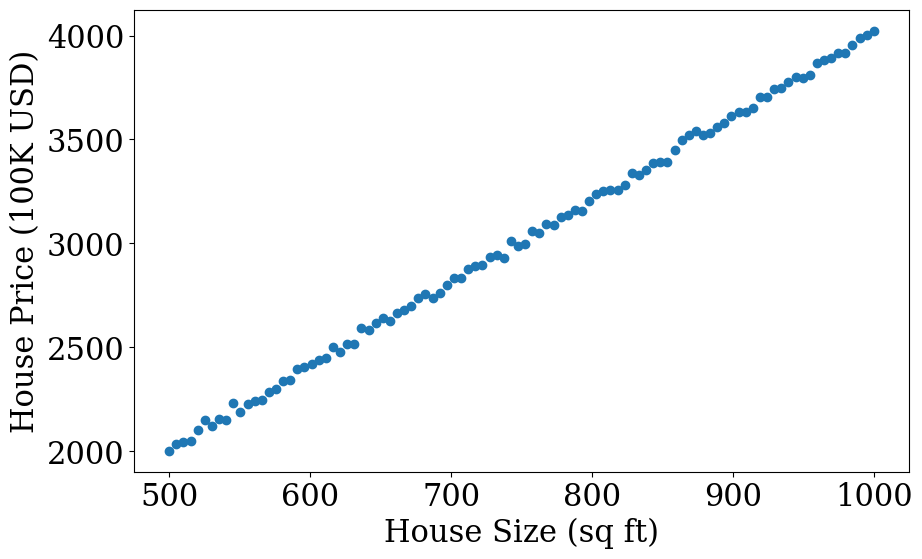

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 22

# Generate x values
x = np.linspace(500, 1000, 100)

# Create a line equation
y = 4.0*x + 7.0

# Add Gaussian noise
mu = 0  # Mean of the Gaussian noise
sigma = 20  # Standard deviation of the Gaussian noise
noise = np.random.normal(mu, sigma, y.shape)
y_noisy = y + noise

## Make a plot
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y_noisy)
fig.patch.set_alpha(0.0)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (100K USD)')
plt.show()



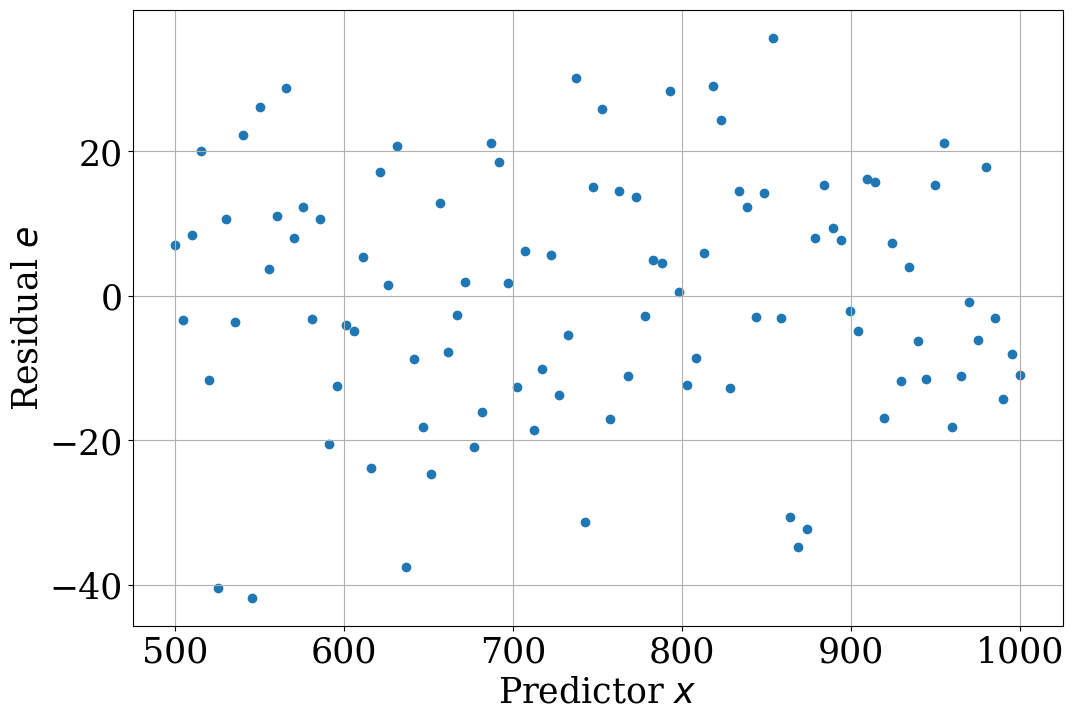

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
plt.rcParams['font.size'] = 25
linearModel = LinearRegression()
linearModel.fit(x.reshape(-1, 1), y_noisy)
yhat = linearModel.predict(x.reshape(-1, 1))
error = yhat - y_noisy
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x, error)
fig.patch.set_alpha(0.0)
plt.xlabel('Predictor $x$', fontsize=25)
plt.ylabel('Residual $e$', fontsize=25)
plt.grid(which='both')
plt.savefig('../figures/normal_residual_plot.pdf', transparent=True)
plt.show()


<Figure size 400x800 with 0 Axes>

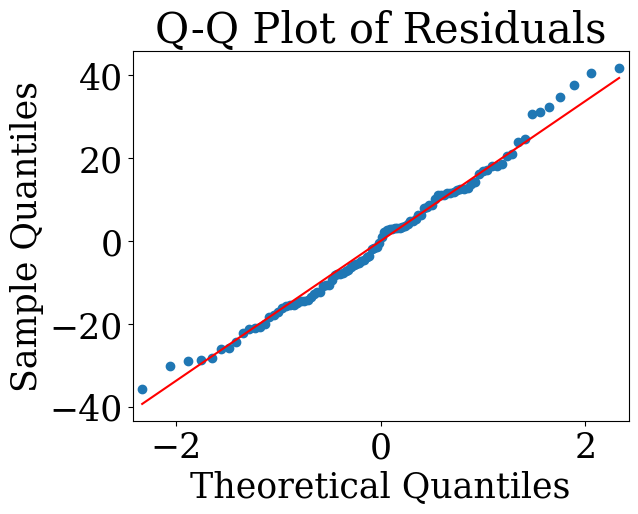

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assume X and y are your data
x = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y_noisy, x).fit()

# Get the residuals
residuals = model.resid

# Create Q-Q plot
plt.figure(figsize=(4, 8))
sm.qqplot(residuals, line='s')  # 's' adds a reference line
plt.title('Q-Q Plot of Residuals')
plt.savefig('../figures/qq_plot.pdf', transparent=True)
plt.show()